# Intro
After completing the popular online Standford Machine Learning course taught by Andrew Ng, I knew it was time for my first Machine Learning/Deep Learning project. I wanted to create a silly neural network that can recognize 
Nicolas Cage in an image. We will be using a Convolutional Neural Network (CNN) to recognize images of Mr. Cage. Keep in mind this is a breakdown of my code and my understanding of concepts in Machine Learning/Deep Learning. If you want to see the just the source code that will be linked [here]() on my GitHub in a separate .py file. 

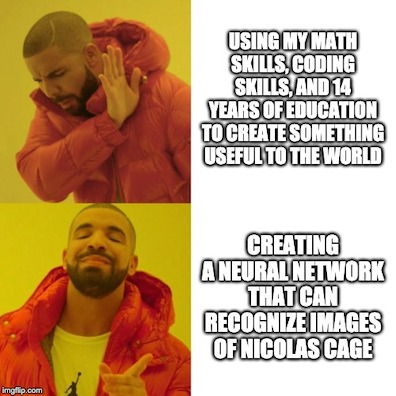

The first step will be importing the popular deep learning library Keras. Keras will help us train our CNN to recognize images

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

Using TensorFlow backend.


### Overview of our model:
I don't like using things if I don't understand what it's doing, I actually find the nitty-gritty mathematics of Machine Learning pretty interesting. We will break down what each import is doing when use each one later in the code

* Sequential Model - Sequential means you can create a model layer by layer. Sequential means there is a single input and single output, almost like a pipeline. A layer is a unit within a deep learning network. Layers contain weights, an activation, and a bias. 

This diagram helps explain what our CNN model will look like. Note: This is just to help visualize, we will only have one node in our output layer not 7. 

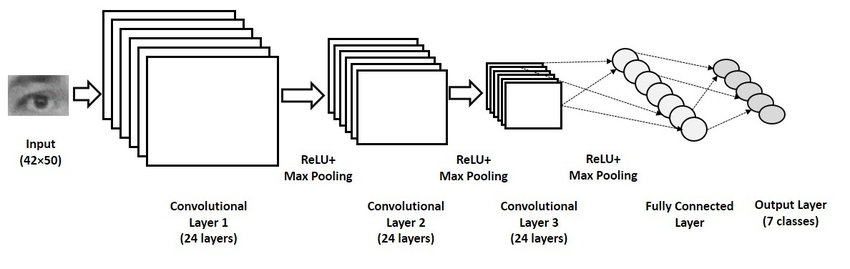


In [2]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))

W0801 22:14:00.517045 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 22:14:00.544028 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 22:14:00.547754 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## Conv2D:
* Conv2D - This layer performs convolution on the initial input image. The gif below helps illustrate what convolution is doing. Convolution basically passes a small "filter" or "weights" box over the initial image matrix and performs matrix multiplication on the image pixel values. During training this allows our network to recognize features of Nicolas Cage in an image.

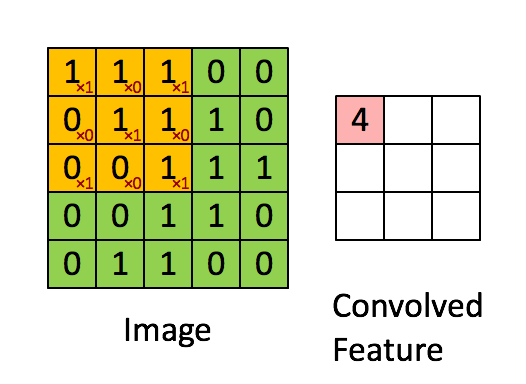

### Conv2D parameters: 
* In our code here we create our model object as a sequential keras model 
* We then add a convolutional layer to it 
* The 32 means we have 32 filters that are size 3x3 
* The input shape means its a 200x200 image and the 3 means its a rbg colored image
* The relu activation function is a function that is used to make sure our values are scaled to a specific range. 

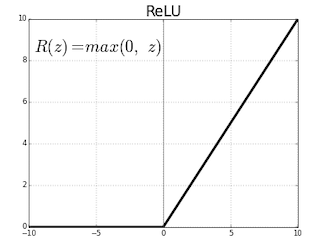

* So if the input to the relu is <= 0 it will make the value 0, otherwise if the input is >0 then it will just output the input 
* Activation functions are used to mimic how our brains neurons fire. When neural networks are computing, a node in a layer may output a value that is not between a specifc range like 0 and 1. Activation functions help force or "squish" our number line into a specifc range of outputs that we desire. 


In [3]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

W0801 22:14:14.675896 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



## Max Pooling:
* MaxPooling2D - Max pooling is also sometimes called downsampling. The convolved feature matrix we created from convolution is (initial image pixels matrix * filter matrix). Pooling looks at this matrix and takes the max value in a given region. The image below helps explain how max pooling downsamples the image. 

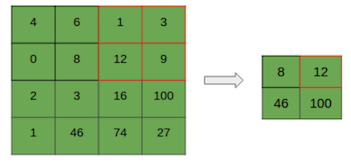

* Here we initalize our pooling layer and we create it to be a size 2x2 just like in our diagram above


In [4]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

## Hidden layers
* This code adds 2 more layers of convolution and maxpooling to help our network better find features in our images. I initially didn't add these extra hidden layers in our network and I had a 89% test accuracy. I added these 2 layers and went up to a 91% test accuracy

In [5]:
classifier.add(Flatten())

## Flatten:
* Flatten - The flatten operation takes a matrix or tensor and flattens it into a very long 1D array of values. The flatten layer usually directly follows the last pooling layer. The flatten operation is necessary because after we've applied convolution to find features of Nicolas Cage we need to flatten the values into a long 1D array and feed it to our fully connected dense network layer. If you look at the end of the CNN diagram you can see what I mean by the values feeding into that dense layer network at the end. 

In [6]:
classifier.add(Dense(units = 64, activation = 'relu'))

## Dense:
* Dense - A dense layer is a linear operation in which every input is connected to every output by a weight (so there are n_inputs * n_outputs weights). If you look at the end of our first CNN overview diagram, that is where the dense layer is used.
* We set units to 64 here. Units refers to the number of nodes in the dense layer. The units value is always between the number of input nodes you have and the amount input nodes you have. A power of 2 is recommended for choosing the amount of units. 
* We again use the relu activation function to avoid negative values and keep our values within a certain range.


In [7]:
classifier.add(Dropout(0.5))

W0801 22:14:34.599759 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 22:14:34.614850 140734900032960 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Dropout: 
* Dropout is a regularization technique used in Deep Learning and neural networks
* Regularization is technique used to help networks not overfit our data
* Overfitting is when our neural network performs well on our training data but very poorly on our test data. This means that the network does not generalize well which means it classifies new images it hasn't seen before incorrectly/poorly
* Explained in the official [paper](http://jmlr.org/papers/v15/srivastava14a.html) for dropout, "In a neural network, the derivative received by each parameter tells it how it should change so the final loss function is reduced, given what all other units are doing. Therefore, units may change in a way that they fix up the mistakes of the other units. This may lead to complex co-adaptations. This in turn leads to overfitting because these co-adaptations do not generalize to unseen data."
* So we essentially switch off some neurons in a layer so that they don't learn any information during the updates (backpropagation) of the network weights. This allows other active neurons to learn better and reduce the error

In [8]:
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

## Output layer:
* This is the last layer for outputting our prediction. We only make it one unit because we want it to output either a 0 or 1. A 1 being an image containing Nicolas Cage and a 0 being image that does not contain Nicolas Cage 

* Here we use a different activation function called sigmoid. Sigmoid is used to "squish" our last value between 0 or 1. Below is a picture of what a sigmoid function looks like it with the equation for it. 
* It condenses our output into either a 0 or a 1. Very negative inputs end up close to 0, very positive inputs end up close to 1. 

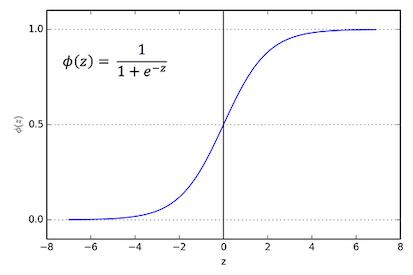

In [9]:
classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0801 22:14:46.624531 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 22:14:46.664911 140734900032960 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0801 22:14:46.676766 140734900032960 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Compiling our model: 
* Here we compile our model. We are about to get a little math heavy so hold on to your hat. 


### Gradient Descent: 
Lets first break down what basic gradient descent is. Gradient descent is a process that minimizes our loss function:
1. We start at a point on our loss function curve
2. We select a learning rate that will determine how much of a step to descend by 
3. We then take the derivative at this point, also called the 'descent' or gradient 
4. We multiply the descent by the learning rate value
5. We move our inital point to this new (descent * learning rate) value on the cuve 
6. We repeat this until we reach a number of iterations specified or some other stop condition like convergence at a local minimia  
* Below is a gif of a gradient descent that helps with visualizing the process:

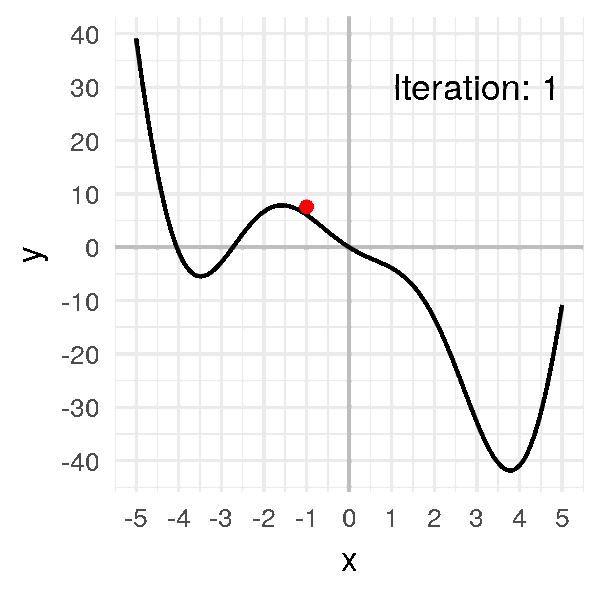


### Stochastic Gradient Descent (SGD): 
* Here we select that we are using Stochastic Gradient Descent optimization algorithim to minimize our loss function. 
* SGD is an ehanced version of regular gradient descent. Lets look at the math. 

Regular gradient descent or sometimes called batch gradient descent is very inefficent for large datasets because it looks at all the training examples. Below is the math equations for batch gradient descent. 

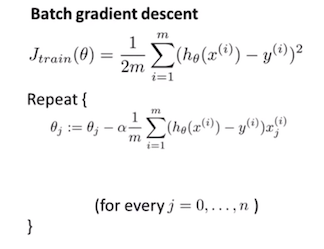

* Jtrain is the cost or loss function. This example is taken from Andrew Ng's Machine Learning course from stanford. He is using squared error for his loss function, we will be using a log loss function so our example is slightly different. 
* We then repeat for every training sample and calculate the partial derivative of our loss function

#### Lets look at the math of SGD: 
* SGD is pretty much the same as batch gradient descent however it calculates the gradient with respect to **one** training example instead of **all** the training examples as it loops through  
* So if we had 20,000 examples, batch gradient descent would scan through all of the 20,000 examples and then change the parameters of our neural network after each loop through the 20,000 examples 
* Whereas SGD adjusts the gradient little by little as we loop through each of our examples. So SGD looks at a single example and then adjusts our parameters as it goes through each example. Below is the math for SGD:

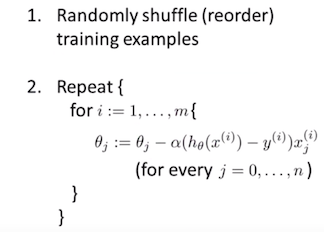






### Binary_crossentropy: 
* Neural networks are trained by decreasing a loss function over time
* Loss functions measure how bad our model performs compared to actual occurrences
* In machine learning/deep learning there are 2 types of loss functions - ones used for classification and one's used for regression. Since we are classifying images we want to use a classification loss function. 
* We choose binary crossentropy or sometimes called log loss as our loss function here since we want an output between 0 or 1.
* The equation for crossentropy is pictured below 

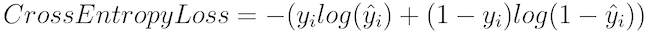

This [article](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23) explains why we use cross entropy: 

* "Notice that when actual label is 1 (y(i) = 1), second half of function disappears whereas in case actual label is 0 (y(i) = 0) first half is dropped off. In short, we are just multiplying the log of the actual predicted probability for the ground truth class. An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong."
* So in other words cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .010 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

* Below is a graph of what the crossentropy loss function looks like:

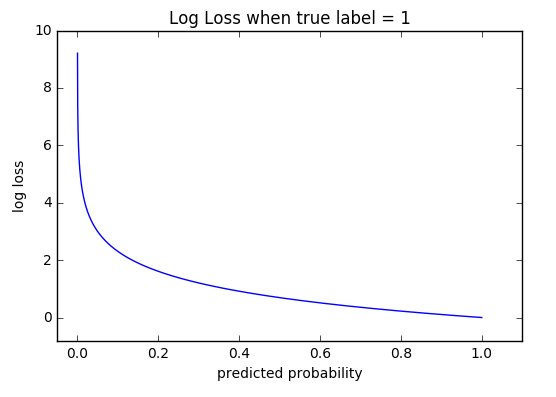

* So to clarify our above intuition with the equation, notice as the predicted probability approaches 1 on the graph, log loss slowy decreases. As the predicted probability approaches 0, the log loss rapidly increases. Log loss heavily penalizes predictions that are confident and wrong


### Metrics: 
* We pass the parameter metric as 'accuracy' because we use accuracy as the metric to measure the performance of the model

In [ ]:
# Nicolas Cage images
import os 

path = "/Users/ginja/Desktop/Code/Nic_Cage/Images"

i = 0
      
for filename in os.listdir(path): 
    new_name = "Nic_Cage_" + str(i) + ".jpg"
    src = path + "/" + filename 
    new_name = path + "/" + new_name
        
    # rename all the files 
    os.rename(src, new_name) 
    i += 1
    


# Not Nicolas Cage images
import requests

path = "/Users/ginja/Desktop/Code/Nic_Cage/Random_images"

for i in range(207):
    url = "https://picsum.photos/200/200/?random"
    response = requests.get(url)
    if response.status_code == 200:
        file_name = 'not_nicolas_{}.jpg'.format(i)
        file_path = path + "/" + file_name
        with open(file_path, 'wb') as f:
            print("saving: " + file_name)
            f.write(response.content)

## Creating our data:  

#### Nicolas Cage: 
* I could not find an existing image dataset of Nicolas Cage so I created my own dataset using the package [google-images-download](https://github.com/hardikvasa/google-images-download) to mass download images of Nicolas Cage. I specified two seperate dates on both the 500 image searches to avoid duplicates. 
* This code above loops through our data and labels all the images with a number and a label of Nicolas cage
* After manually deleting the images that had other people in them or images that were incorrect I was able to collect 207 images of Nicolas cage


#### Not Nicolas Cage: 
* Starting out on this project I thought I could do a one class classification neural network. I would just have one class of Nicolas Cage images and feed that to the network. I figured during training the network would learn the features of Nicolas Cage and be able to recognize him in a picture. 
* I eventually learned that the network needs "negative" examples to help it learn what Nic Cage images look like and what non Nic Cage images look like. Therefore we needed to collect an image dataset of random images that were not Nicolas Cage. 
* I used this python code and the picsum website to generate and save 207 random images of Not Nicolas Cage
* Next step is to create our training set and test set directories 


### Train and Test set: 
* Since I had a smaller amount of data I decided to just manually create and organize the test and train sets of our images. In a project with thousands of images it would be more realisitic to use python to create our directories and use for loops to orangize our data. 
* I decided to use a 70/30 split for our data since we don't have a ton of data. So 70% of the data is used as training data and 30% is used as test data 
* So our train data will have 145 images of Nicolas Cage and our test data will have 62 images of Nicolas Cage
* I created two subfolders inside of our train and test directories called "class0" and "class1". Class1 contains our images of Nicolas Cage and Class0 contains our random images. 
* Keras flow_from_directory reads the folders in our train and test directory alphanumerically. It took me a while to figure this out because at first my network was labeling the Nicolas Cage images as the "0" class. This was because I had two folders: "Nicolas_Cage" and "Not_Nicolas". It was reading the "Nicolas_Cage" as the 0 class. I then fixed this and saw great results with my network. 


In [49]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/ginja/Desktop/Code/Nic_Cage/Dataset/train/',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 shuffle = True, 
                                                 class_mode = "binary")

test_set = test_datagen.flow_from_directory('/Users/ginja/Desktop/Code/Nic_Cage/Dataset/test/',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            shuffle = True,
                                            class_mode = "binary")
print(training_set.class_indices)

Found 290 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


## ImageDataGenerator
Here we want to pre process our images to get them ready to be fed into the neural network. We use the ImageDataGenerator class inside of Keras. The class takes in a batch of images and applies augmentations like resizing and shearing to the images. It then passes the augmented data to the neural network.

### What is Data Augmentation?: 
* According to the super helpful site [pyimagesearch](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/), Data augmentation generates “new” training samples from the original ones by applying random jitters and perturbations (but at the same time ensuring that the class labels of the data are not changed).
* It essentially creates new training samples that are slightly "different" than the original training samples 
* The goal when applying data augmentation is to increase the generalizability of the model. We use augmentation since we have such a small amount of images and it will help our model generalize new images of Nicolas Cage. Below is a helpful image that explains what augmentation does:

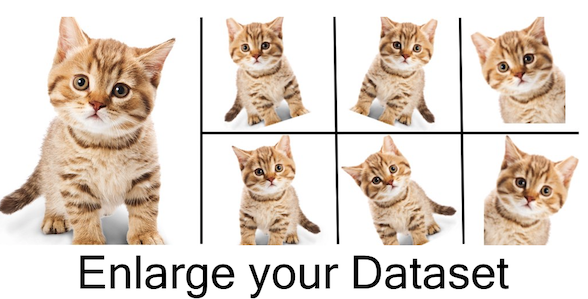

### Parameters 
* rescale - we scale the image by a ratio of 1./255
* shear range - We specificy a range for our image to be sheared or shifted a certain direction 
* zoom range - We specificy a range for our image to be randomly zoomed in on
* horizontal_flip - Randomly flip inputs horizontally
* target size - is the size of our input images, every image will be resized 200x200
* batch_size - we loop over our images in batches so we make our batch size 32 images big 
* class_mode - we set this to “binary” since we have only two classes to predict Nicolas Cage in an image or not



In [12]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100)

Epoch 1/25
1000/1000 [==============================] - 913s 913ms/step - loss: 0.3476 - acc: 0.8502 - val_loss: 2.2280 - val_acc: 0.5000
Epoch 2/25
1000/1000 [==============================] - 907s 907ms/step - loss: 0.1354 - acc: 0.9564 - val_loss: 0.5738 - val_acc: 0.8629
Epoch 3/25
1000/1000 [==============================] - 904s 904ms/step - loss: 0.0675 - acc: 0.9825 - val_loss: 0.6880 - val_acc: 0.8710
Epoch 4/25
1000/1000 [==============================] - 910s 910ms/step - loss: 0.0170 - acc: 0.9956 - val_loss: 0.7560 - val_acc: 0.8710
Epoch 5/25
1000/1000 [==============================] - 952s 952ms/step - loss: 0.0454 - acc: 0.9893 - val_loss: 0.7865 - val_acc: 0.8710
Epoch 6/25
1000/1000 [==============================] - 908s 908ms/step - loss: 0.0158 - acc: 0.9959 - val_loss: 0.7694 - val_acc: 0.8952
Epoch 7/25
1000/1000 [==============================] - 908s 908ms/step - loss: 0.0833 - acc: 0.9851 - val_loss: 0.7052 - val_acc: 0.8790
Epoch 8/25
1000/1000 [============

## Fitting the model: 
* This code fits our model to the be able to classify images of Nicolas Cage. As you can see by the end of the 25th epoch we were able to acheieve 99% test accuracy and 91% test accuracy. 
* Since we performing augmentations to our data during training we use the classifier.fit_generator function. The classifier.fit would not work here since we are doing augmentations to our data.

### Parameters:
* training_set - We pass in our training set ImageDataGenerator to augment our training images during training
* steps_per_epoch - our fit_generator loops infinitely so we specify how many times we want it to loop 
* epochs - defines the number times that the learning algorithm will work through the entire training dataset
* test_set - We pass in our test set ImageDataGenerator to augment our test images during training
* val_steps - Total number of steps (batches of samples) to yield from our test data generator before stopping at the end of every epoch

### The "learning": 
Neural networks learn by a process called back propagation. The keras .fit functions perform this process automatically for us so we don't have to write the code by hand but what exactly is back propagation? The videos that helped me the most with understanding this was [neural networks demystified](https://youtu.be/UJwK6jAStmg?t=130) and [3Blue1Brown's back prop video](https://youtu.be/Ilg3gGewQ5U)

#### Forward Propagation:
* Neural Networks take in an input and perform a process called forward propagation. To understand back propagation we first need to understand the process of forward propagation. 
* Each little line connecting each neuron in a neural network is called a synapse and each one holds a "weight" value. The diagram below helps show a visual example of what a small network would look like. 

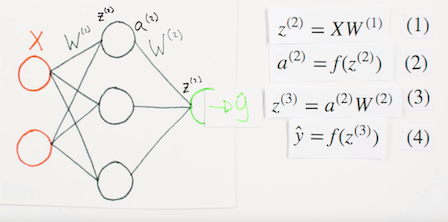

 1. First forward propagation takes in an input matrix $X$ of values and multiplies it by our first layer weight matrix $W^1$. In our case the input matrix is the pixel values of our image. 
 2. A synapse is the little lines connecting each neuron in the network. Each synapse contains a "weight" value. So the weight matrix is all of our synapses of the first layer in a matrix. So $Z^2$ is (our input values matrix $X$ * $W^1$ our weight values matrix for the first layer + $b$ the bias node)
 3. $a^2$ is our (input matrix $X$ * weight matrix $W^1$ + bias $b$) passed into an activation function like sigmoid or relu. $a^2$ now represents all the values in our hidden layer. 
 4. Now $a^2$ is fed forward and multiplied by the next set of weights $W^2$ to give us the value of $Z^3$ 
 5. We do the same process as we did in the first layer. We pass $Z^3$ into an activation function to get our predicted output value 

This is obviously a very simple neural network that only contains one hidden layer with 3 nodes but forward propagation works the same on larger and more complicated neural networks. It's essentially feeding the previous layer input values forward each time and applying matrix multiplication between our input and weights matrix plus our bias. Then it applys an activation function to "squish" our values into a desired range. Starting out forward propagation will output terrible prediction values. In our training you can see an example of this as our test accuracy in the first epoch was 50%. Back prop will help tweak our weight values in our network to help our network actually learn.

#### Back Propagation:
* Neural networks learn by minimizing a 'cost' or 'loss' function. When a neural network outputs a prediction after forward propagation we look how wrong this prediction is by looking at a cost function. Our cost function is a log loss function. So we minimize this function using gradient descent.
* During gradient descent we take the derivative at the point on the curve. This derivative tells us the slope of the tangent line. We want to move our point on the loss curve to go in the negative slope direction. Basically We want to guide the point on our loss curve towards the negative slope because we want to minimize the cost function. But how do we get this derivative? 

Explained in the amazing 3Blue1Brown back propagation video, at a high level back propagation is the process of determining what changes or tiny "nudges" to the weights and biases in our network that will cause the most efficent and rapid decrease to the cost function based on a single training example. Back propagation is recursive meaning the output layer slope depends on the previous layer slope which depends on the previous layer slope and so on throughout the network. Lets look at what this means using calculus: 

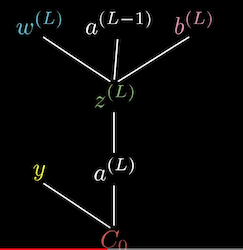

* This is a diagram of what a simple neural network looks like going backwards. $C_0$ represents the cost value. $C_0 = (a^L -y)^2$. Our cost function is log loss not squared error but this is just for explanation purposes  
* $z^L$ is equal to = (the weights matrix $W^L$ * the previous layer values $a^{L-1}$ + the bias $b^L$)
* $a^L$ is just $Z^L$ passed into an activation function

* This is essentially a diagram looking at the ending of forward propagation and looking back up the network. The network in this example only has one neuron per layer to keep it simple at first.  

#### The math: 
With back propagation we need 3 equations. We use partial derivatives when doing back propagation because we want to see how certain parts of our network affect the cost function while everything else stays constant. We want to see how the weights indivually affect the cost function, how the bias individually affects the cost function, and how the previous layers individually affect the cost function.

1. $\frac{\partial C}{\partial W^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial Z^L} \frac{\partial Z^L}{\partial W^L}$

    * Thats a gross looking equation so lets try to explain each piece: 
    * With back propagation we are trying to calculate how sensitive our cost function is to small changes in our weight $W^L$. So $\frac{\partial C}{\partial W^L}$ = the derivative of our cost function with respect to our weights 
    * This "nudge" to the weights cause "nudges" to all the other components in the network. So to calculate all these tiny nudges we use the chain rule from calculus. 
    * $\frac{\partial Z^L}{\partial W^L} = a^{L-1}$ = derivative of $z^L$ with respect to our weights 
    * $\frac{\partial a^L}{\partial Z^L} = \sigma'(Z^L)$ = derivative with respect to our activation function 
    * $\frac{\partial C_0}{\partial a^L} = 2(a^L - y)$ = derivative with respect to our cost function 
    * So all put together, the derivative of a **single** training example with respect to $W^L$ is $\frac{\partial C}{\partial W^L} = a^{L-1}\sigma'(Z^L)2(a^L - y)$

    * But that is just one training example. The derivative of the full cost function requires averaging over all the training examples. 

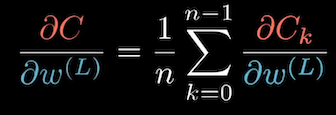

2. So thats just one partial derviative we need. Now we need the partial derivative of the cost with respect to the bias!: 
    * $\frac{\partial C}{\partial b^L} = \frac{\partial Z^L}{\partial b^L}\frac{\partial a^L}{\partial Z^L}\frac{\partial C}{\partial a^L}$
    * $\frac{\partial C}{\partial b^L}  = 1*\sigma'(Z^L)2(a^L - y)$

3. Lastly we need the partial deriviative with respect to the previous layer 
    * $\frac{\partial C}{\partial a^{L-1}} = \frac{\partial Z^L}{\partial a^{L-1}}\frac{\partial a^L}{\partial Z^L}\frac{\partial C}{\partial a^L}$
    * $\frac{\partial C}{\partial a^{L-1}}  = w^L\sigma'(Z^L)2(a^L - y)$

#### Putting it all together: 
* The equations above were simplified for having one neuron in each layer of a simple network. This is the more advanced put together equation for calculating the derivative in back propagation. 

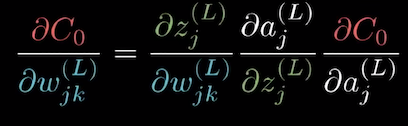
This is essentially the same equation as before but a little more advanced as to handle a network that has more than **one** neuron in each layer which is where the **jk** iteratable indexes come from. 

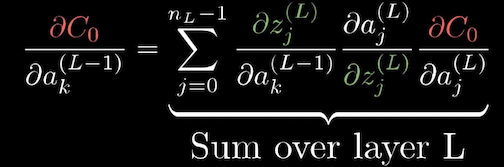
This is the final equation for back propagation. As you can see it changed slightly from our previous equation. 
* $\frac{\partial C_0}{\partial a_k^{L-1}}$ is the derivative of the cost function (slope of the tangent line on our cost function) with respect to the previous activation layer 
* we sum over every layer in our network 
* $\frac{\partial Z_j^L}{\partial a_k^{L-1}}$ is the derivative of the weighted sum of ((weights $W^L$ * previous layers $a^{L-1}$) + bias) with respect to the previous activation layer 
* $\frac{\partial a^L}{\partial z_j^L}$ is the derivative of the **current** activation layer with respect to the weighted sum of ((weights $W^L$ * previous layers $a^{L-1}$) + bias)
* $\frac{\partial C_0}{\partial a_j^L}$ is the derivative of the cost function with respect to the current activation layer

We get rid of the ${\partial W_{jk}^L}$ the derivative with respect to weight and we convert it to ${\partial a_k^{L-1}}$ . Which is the derivative of the cost function with respect to one the activations in the layer L-1. The reason we do this is because the neuron at $a_k^{L-1}$ influences all of the neurons in the $a^L$ layer. Below is a helpful image describing this: 

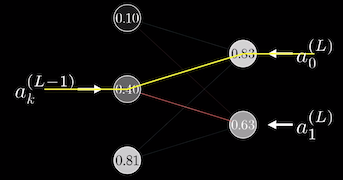

Is it necessary to understand the gross looking calculus to be able to get our network to perform well? Thankfully not since Keras does this process automatically for us but I thought it was interesting to go down the math rabbit hole. Back propagation is super confusing and to be completely honest I still sometimes get lost when I look at all the calculus. Many times I still have to go review it and watch helpful youtube videos to try and polish my understanding. 

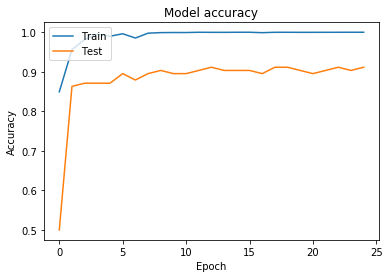

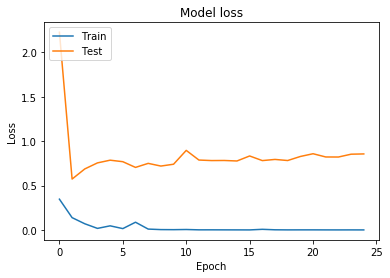

In [16]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Accuracy and Loss:
* This code lets us visualize our model accuracy and model loss. The code is from [here](https://keras.io/visualization/) explained in the Keras documentation 
* As we can see our test and train accuracy are pretty close near the 25th epoch and the same goes for our model loss! 
* We ended our training with a 91% test accuracy and a 99% train accuracy which is pretty good. 

This is Nicolas Cage:


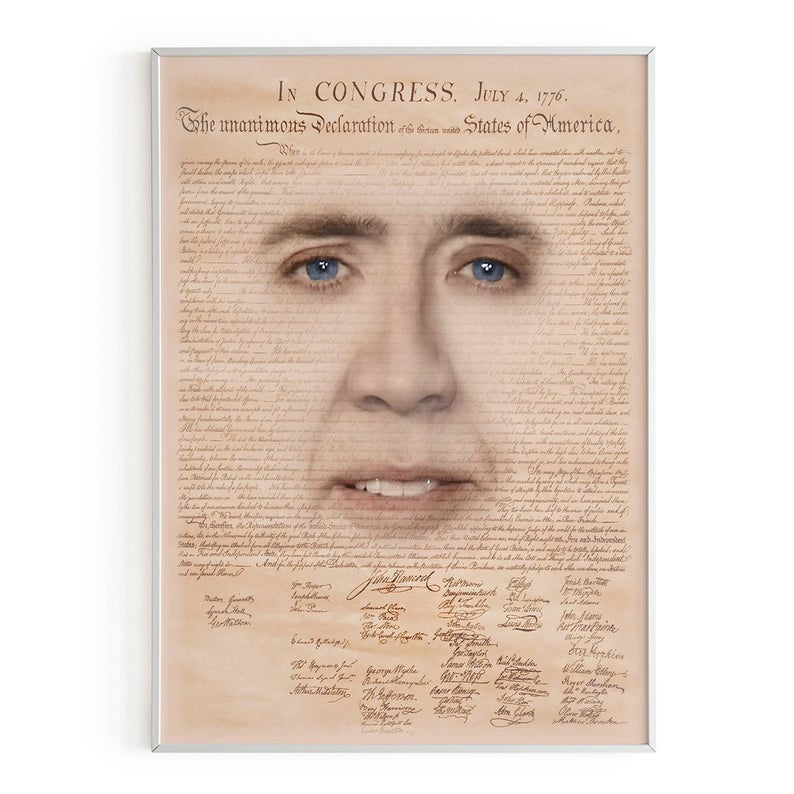





This is Nicolas Cage:


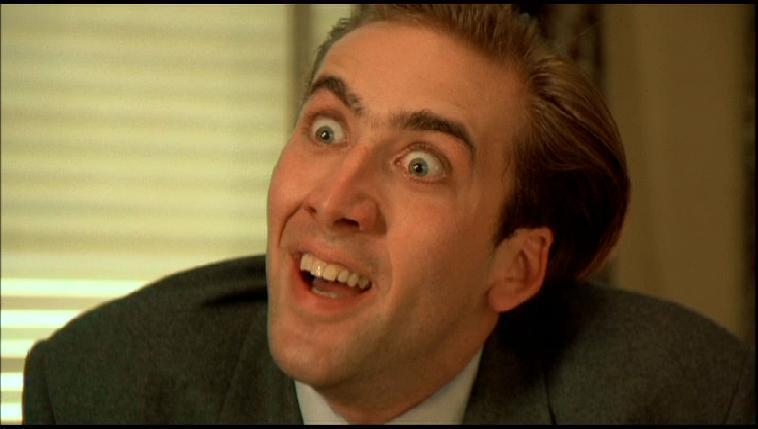





This is not Nicolas Cage:


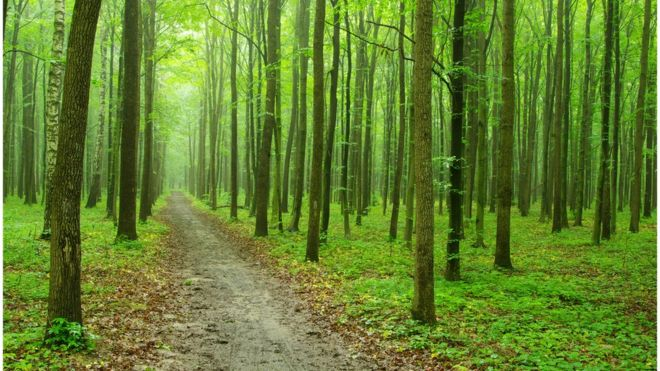





This is Nicolas Cage:


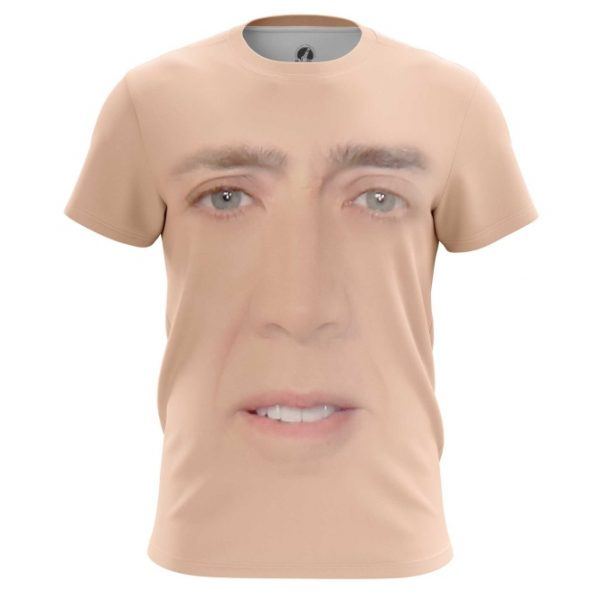





This is Nicolas Cage:


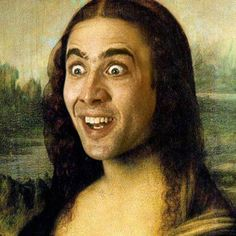





This is not Nicolas Cage:


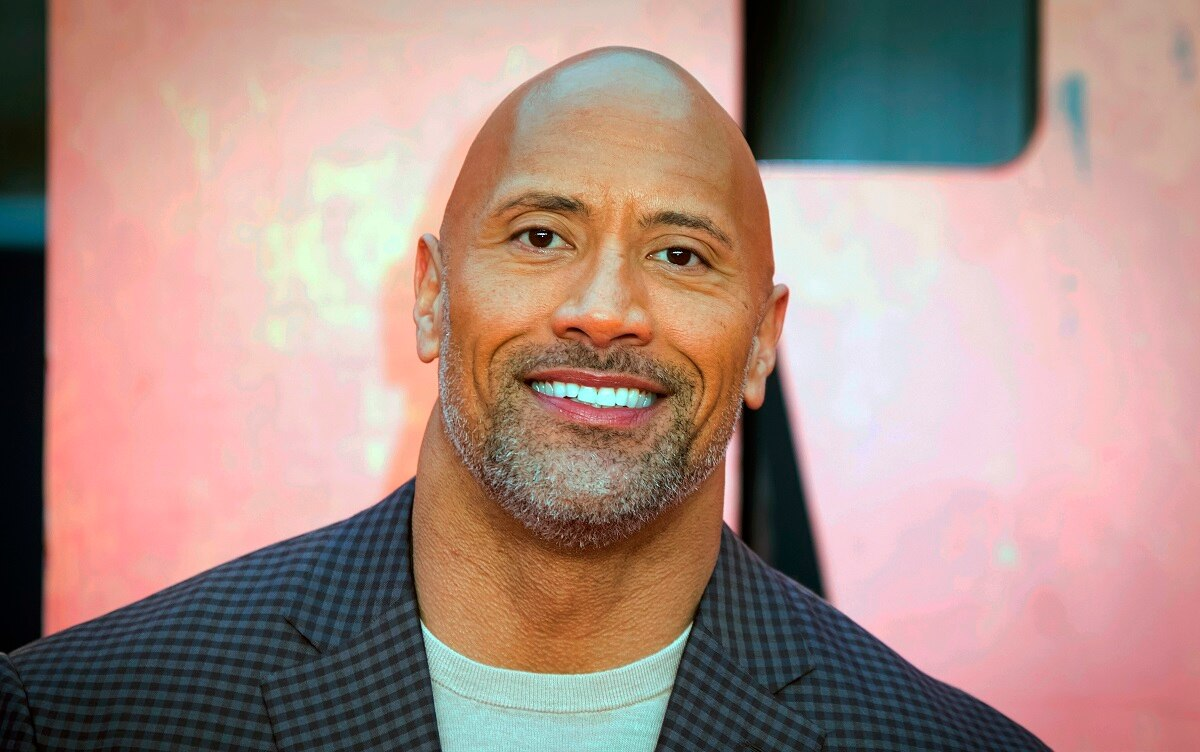





This is Nicolas Cage:


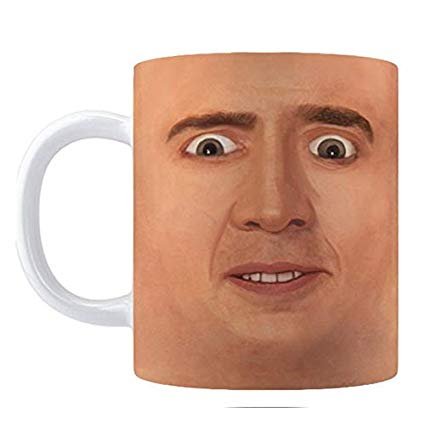





This is not Nicolas Cage:


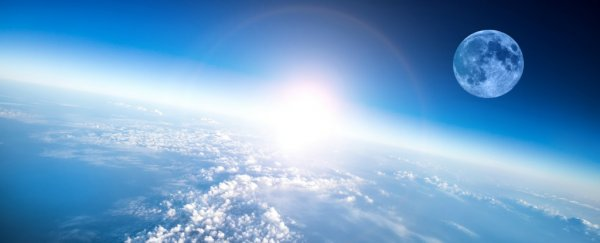





This is Nicolas Cage:


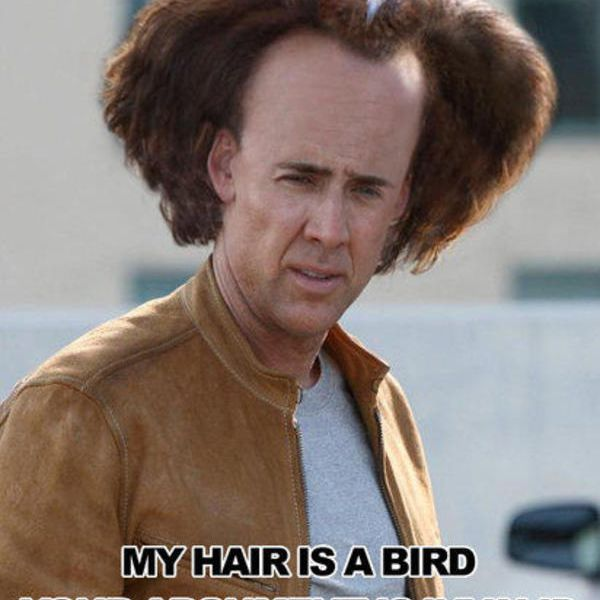





This is Nicolas Cage:


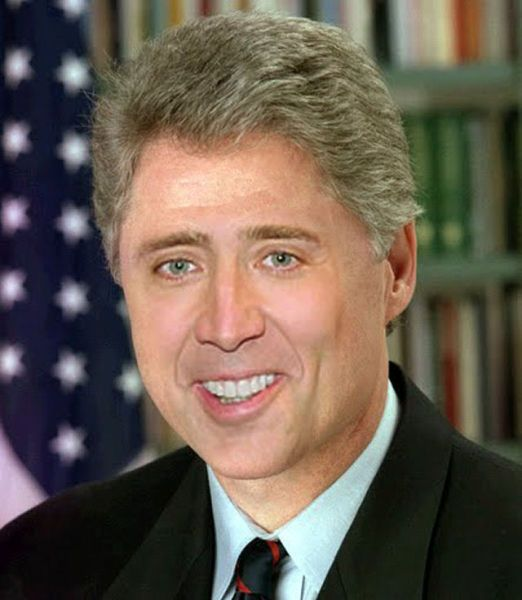





This is Nicolas Cage:


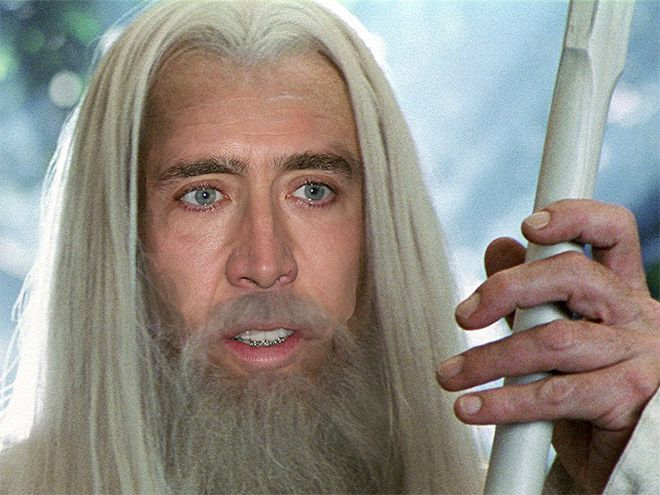

In [47]:
from keras.preprocessing import image
import numpy as np 
from IPython.display import Image
import os

predict_path = '/Users/ginja/Desktop/Code/Nic_Cage/Predict'
for file in os.listdir(predict_path):
    if not file.startswith('.'): # to avoid .ds_store files on my mac
        file = predict_path + "/" + file
        
        test_image = image.load_img(file, target_size = (200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        
        result = classifier.predict(test_image)
        training_set.class_indices
        if result[0][0] == 1:
            prediction = 'This is Nicolas Cage:'
        else:
            prediction = 'This is not Nicolas Cage:'

        print(prediction)
        img = Image(file, width = "400", height = "400")
        display(img)
        print("\n")
        print("\n")

## Making the prediction: 
* As you can see our model recognizes these beautiful and absolutely inspirational pictures of Nicolas Cage.
* Our model also recognizes images that are not Nicolas Cage like the picture of The Rock or the picture of the sky
* I was really happy with results of our network. Our network was able to even recognize stupid meme pictures of Nicolas Cage like the image with his face edited on to Bill Clinton's face 


# Conclusion:
* I learned so much about deep learning doing this project and had so much fun creating it. The course I took from Stanford was the popular machine learning course taught by Andrew Ng. The course gave me a good foundation of concepts in Machine Learning and introduced me to concepts like Neural Networks, Back Propagation, Linear Regression, and even Support Vector Machines. But I knew the most learning was going to come from diving in and creating a project.
* I think I maybe could have collected more data of Nicolas Cage to get a higher test accuracy but regardless I'm pretty happy with the results as the model was able to recognize our memes pretty well. 
* This project may have been more interesting if I would have applied binary classification to a different dataset like classifying galaxy and blackhole images or even constellations in space but the idea of a neural network recognizing images of Nicolas Cage seemed too funny and too good to pass up 

## Contact:
* If you have questions, concerns, constructive criticsm, or want to see more of future projects please check out my [github](https://github.com/DrewScatterday), my [linkedin](https://www.linkedin.com/in/drew-scatterday-415146147/), and my [medium](https://medium.com/@drewscatterday) where I have also posted this project. Thanks for reading! 


## Resources: 
* https://ml-cheatsheet.readthedocs.io/en/latest/
* https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
* https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
* https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23
* https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
* https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2
* https://www.charlesbordet.com/en/gradient-descent/#
* https://keras.io
* Sentdex youtube - https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ
* Siraj Raval youtube - https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A